# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
pip install citipy 


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind =  city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | ati
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | pangai
Processing Record 5 of Set 1 | sambava
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | pachino
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | benguela
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | tinguindin
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | esperance
Processing Record 23 of Set 1 | qaan

Processing Record 36 of Set 4 | yangshe
Processing Record 37 of Set 4 | salekhard
Processing Record 38 of Set 4 | awjilah
Processing Record 39 of Set 4 | hastings
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | lufilufi
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | muskegon heights
Processing Record 46 of Set 4 | gamba
Processing Record 47 of Set 4 | ternate
Processing Record 48 of Set 4 | muzquiz
City not found. Skipping...
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | port blair
Processing Record 1 of Set 5 | yialos
City not found. Skipping...
Processing Record 2 of Set 5 | tudora
Processing Record 3 of Set 5 | isla mujeres
Processing Record 4 of Set 5 | xalpatlahuac
Processing Record 5 of Set 5 | wieliczka
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | port elizabeth
Processing

Processing Record 24 of Set 8 | mercedes
Processing Record 25 of Set 8 | venado tuerto
Processing Record 26 of Set 8 | wajid
Processing Record 27 of Set 8 | juegang
Processing Record 28 of Set 8 | gambo
Processing Record 29 of Set 8 | ilinskiy
Processing Record 30 of Set 8 | boyolangu
Processing Record 31 of Set 8 | corrientes
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 34 of Set 8 | chaochou
City not found. Skipping...
Processing Record 35 of Set 8 | nizhniy baskunchak
Processing Record 36 of Set 8 | tombouctou
Processing Record 37 of Set 8 | jurm
Processing Record 38 of Set 8 | seoul
Processing Record 39 of Set 8 | funadhoo
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | lolua
City not found. Skipping...
Processing Record 42 of Set 8 | tshikapa
Processing Record 43 of Set 8 | hualmay
Processing Record 44 of Set 8 | praya
Processing Record 45 of Set 8 | hamilton
Process

Processing Record 11 of Set 12 | mananara
Processing Record 12 of Set 12 | codrington
Processing Record 13 of Set 12 | gbarnga
Processing Record 14 of Set 12 | tura
Processing Record 15 of Set 12 | uxbridge
Processing Record 16 of Set 12 | atar
Processing Record 17 of Set 12 | alugan
Processing Record 18 of Set 12 | morant bay
Processing Record 19 of Set 12 | waddan
Processing Record 20 of Set 12 | hearst
Processing Record 21 of Set 12 | ginda
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 24 of Set 12 | sayyan
Processing Record 25 of Set 12 | dieppe
Processing Record 26 of Set 12 | kurumkan
Processing Record 27 of Set 12 | purranque
Processing Record 28 of Set 12 | tahoua
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | ampanihy
Processing Record 31 of Set 12 | manta
Processing Record 32 of Set 12 | dien bien
City not found. Skipping...
Processing Record 33 of Set 12 | w

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,19.80,64,0,2.74,AU,1675986421
1,ati,13.2154,18.3353,21.04,10,70,4.66,TD,1675986422
2,yellowknife,62.4560,-114.3525,-19.71,84,20,2.06,CA,1675986321
3,pangai,-19.8000,-174.3500,30.06,66,20,3.09,TO,1675986427
4,sambava,-14.2667,50.1667,23.35,90,43,3.39,MG,1675986428


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,19.80,64,0,2.74,AU,1675986421
1,ati,13.2154,18.3353,21.04,10,70,4.66,TD,1675986422
2,yellowknife,62.4560,-114.3525,-19.71,84,20,2.06,CA,1675986321
3,pangai,-19.8000,-174.3500,30.06,66,20,3.09,TO,1675986427
4,sambava,-14.2667,50.1667,23.35,90,43,3.39,MG,1675986428


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

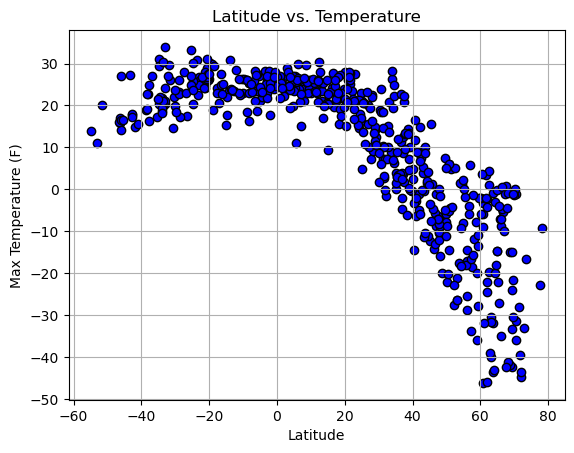

In [51]:
lat=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat,temp,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

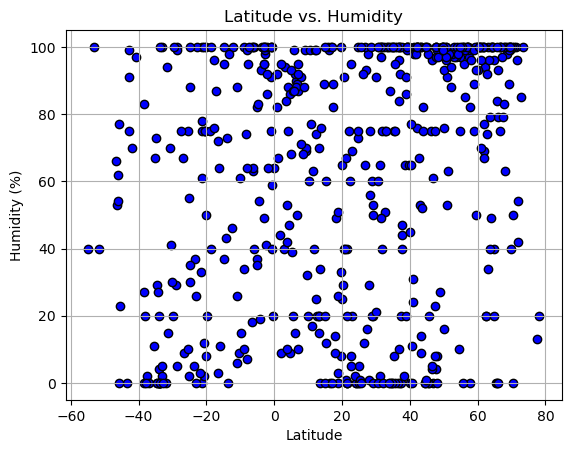

In [53]:
lat=city_data_df["Lat"]
humid=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat2,humid,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

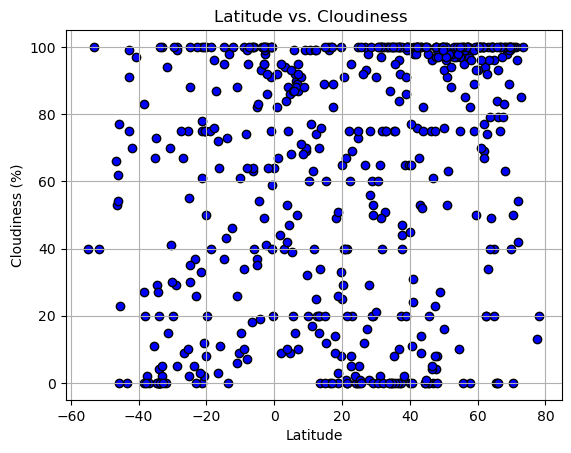

In [54]:
lat2=city_data_df["Lat"]
cloud=city_data_df["Cloudiness"]
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat3,cloud,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

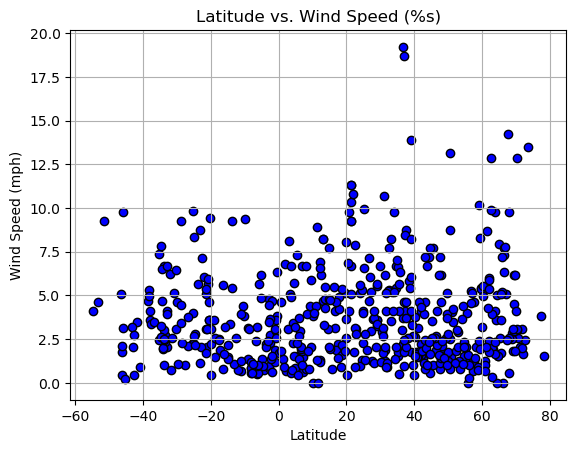

In [49]:
lat=city_data_df["Lat"]
wind=city_data_df["Wind Speed"]
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat4,wind,marker="o",facecolors="blue",edgecolor="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, text_coordinates):     
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ati,13.2154,18.3353,21.04,10,70,4.66,TD,1675986422
2,yellowknife,62.4560,-114.3525,-19.71,84,20,2.06,CA,1675986321
6,albany,42.6001,-73.9662,7.58,80,100,1.34,US,1675985770
7,pachino,36.7186,15.0907,11.34,94,100,19.21,IT,1675986429
10,butaritari,3.0707,172.7902,27.12,82,94,8.13,KI,1675986430


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,19.80,64,0,2.74,AU,1675986421
3,pangai,-19.8000,-174.3500,30.06,66,20,3.09,TO,1675986427
4,sambava,-14.2667,50.1667,23.35,90,43,3.39,MG,1675986428
5,saint-pierre,-21.3393,55.4781,24.82,69,0,3.09,RE,1675986428
8,cape town,-33.9258,18.4232,21.88,71,0,6.69,ZA,1675986429


###  Temperature vs. Latitude Linear Regression Plot

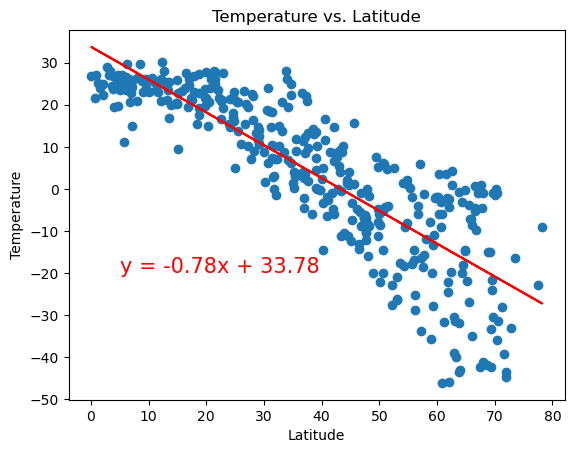

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(5,-20))

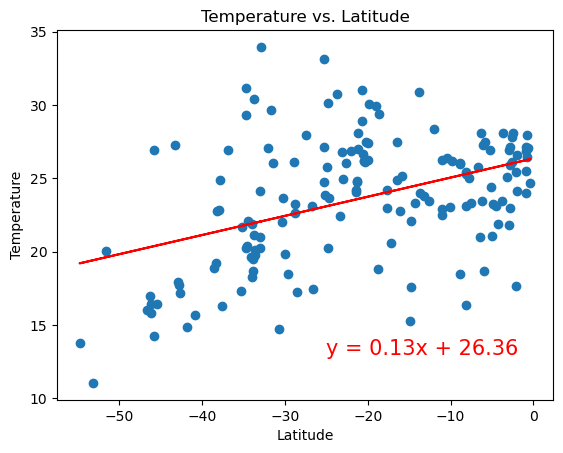

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Temperature"
title="Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates=(-25,13))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


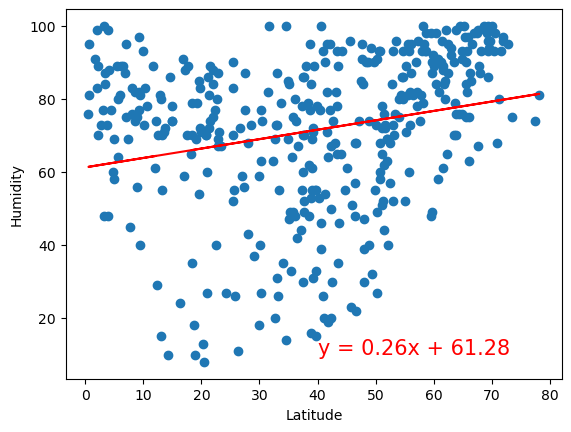

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

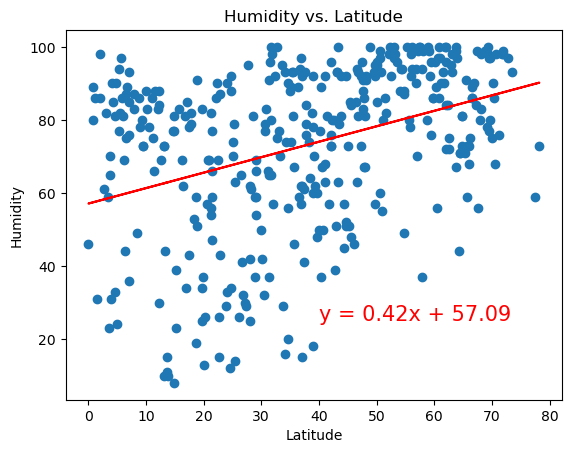

In [43]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title="Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,25))

### Cloudiness vs. Latitude Linear Regression Plot

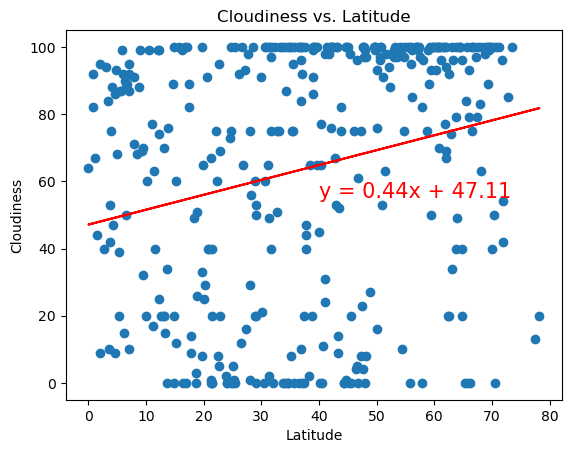

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(40,55))

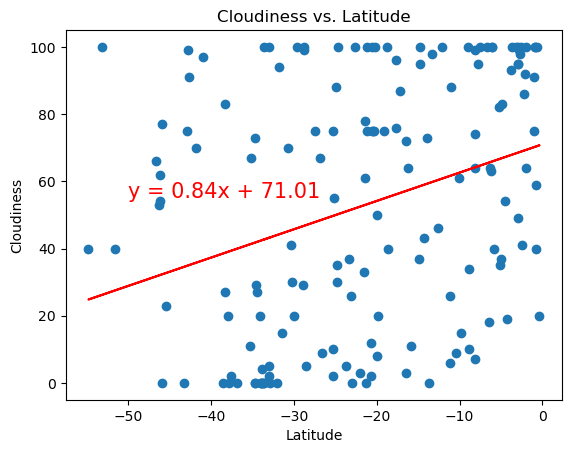

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title="Cloudiness vs. Latitude"
regression(x_values, y_values, text_coordinates=(-50,55))

### Wind Speed vs. Latitude Linear Regression Plot

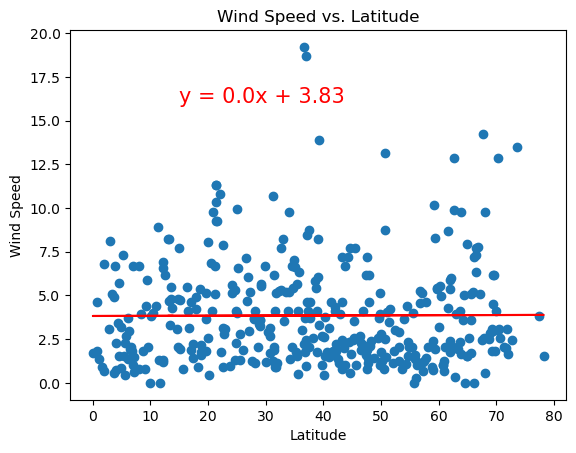

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(15,16))

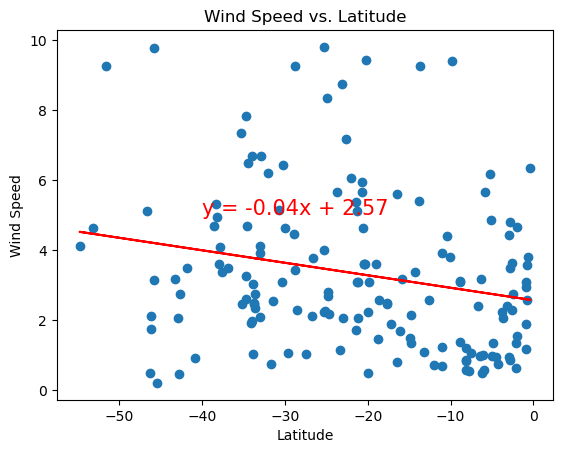

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title="Wind Speed vs. Latitude"
regression(x_values, y_values, text_coordinates=(-40,5))